In [2]:
import pickle
import seaborn as sns
import pandas as pd
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

def abs_error(abs_error,n_pts):
    error = np.zeros((abs_error.shape[0], n_pts))
    for k in range(n_pts):
        error[:, k] = np.mean(abs_error[:, 3*k:3*(k + 1)], axis=1)
        
    return error

# Behaviors

In [3]:
import seaborn as sns
import pandas as pd
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

root_dir = '/data/LiftPose3D/fly_tether/behaviors/'
train_dir = ['train_PR', 'train_MDN', 'train_aDN']
test_dir = ['test_PR', 'test_MDN', 'test_aDN']

ttl_err = []
for i in range(3):
    for j in range(3):
        path = os.path.join(root_dir, train_dir[i], test_dir[j])
        all_err = torch.load(path + '/test_results.pth.tar')['all_err']
        ttl_err.append(np.nanmean(all_err, axis=1))

ttl_err = pd.DataFrame(ttl_err)
ttl_err.columns.names = ['frame']
ttl_err.index = pd.MultiIndex.from_tuples([('train_PR', 'test_PR'), ('train_PR', 'test_MDN'), ('train_PR', 'test_aDN'), 
                                             ('train_MDN', 'test_PR'), ('train_MDN', 'test_MDN'), ('train_MDN', 'test_aDN'),
                                             ('train_aDN', 'test_PR'), ('train_aDN', 'test_MDN'), ('train_aDN', 'test_aDN')],
                                         names=['train', 'test'])

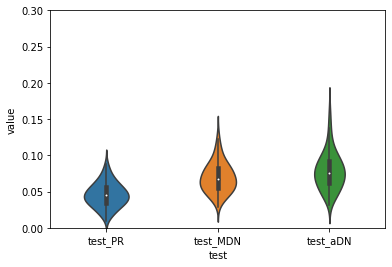

In [5]:
#train PR
ttl_err1 = ttl_err.T
ttl_err1= ttl_err1.loc[:,('train_PR',slice(None))]#
q = ttl_err1.quantile(q=0.98)
ttl_err1 = ttl_err1[ttl_err1<q].melt()
sns.violinplot(x="test", y="value", data=ttl_err1,bw=0.5, width=0.4)
plt.ylim(0, 0.3)
plt.grid(False)
#plt.savefig('train_PR.svg')

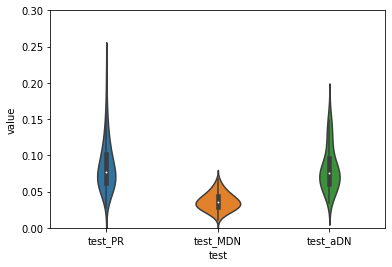

In [25]:
#train MDN
ttl_err1 = ttl_err.T
ttl_err1= ttl_err1.loc[:,('train_MDN',slice(None))]#
q = ttl_err1.quantile(q=0.98)
ttl_err1 = ttl_err1[ttl_err1<q].melt()
sns.violinplot(x="test", y="value", data=ttl_err1,bw=0.5, width=0.4)
plt.ylim(0, 0.3)
plt.grid(False)
#plt.savefig('train_MDN.svg')

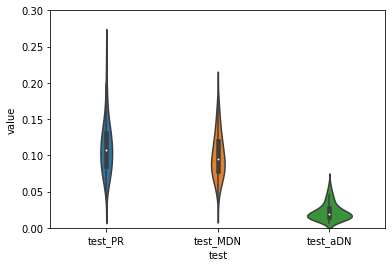

In [26]:
#train aDN
ttl_err1 = ttl_err.T
ttl_err1= ttl_err1.loc[:,('train_aDN',slice(None))]#
q = ttl_err1.quantile(q=0.98)
ttl_err1 = ttl_err1[ttl_err1<q].melt()
sns.violinplot(x="test", y="value", data=ttl_err1,bw=0.5, width=0.4)
plt.ylim(0, 0.3)
plt.grid(False)
#plt.savefig('train_aDN.svg')